### Creating the models

This section can be modified to allow for more variation in the models but for now they are initialized the same way but with different weights. This means that the models are still independent but the have the same structure.

### Dataset

### Required

To run this you will need to run ``pip3 install EasyNN``

In [2]:
# How many models do you want to produce?
number_of_models = 2

### Creating the models for the ensembled nn.

In [3]:
from EasyNN.model import Network, Normalize, Randomize, ReLU, LogSoftMax
from EasyNN.examples.mnist.number.data import dataset
from EasyNN.examples.mnist.number import labels, show
from EasyNN.optimizer import MomentumDescent
import EasyNN.callbacks as cb
import numpy as np

for index in range(number_of_models):

    # Create the mnist model.
    model = Network(
        Normalize(1e-3), Randomize(0.01),
        1024, ReLU,
        256, ReLU,
        10, LogSoftMax,
    )
    # Set your models data
    model.training.data = dataset

    # Establish the labels and show feature.
    model.labels = labels
    model.show = show 

    # Use gradient descent with momentum.
    model.optimizer = MomentumDescent()

    # Change the default learning rate.
    model.optimizer.lr = 0.03

    model.callback(
        # Set when to terminate point. 
        
            # In this case it will end once your validation
            # accuracy hits above 85% five times. The high 
            # percentage you add the longer it will take to train.
        cb.ReachValidationAccuracy(limit=0.85, patience=1),
    )

    # When the model hit a validation point it will print the iteration and accuracy of the model.
    model.print.on_validation_start(iteration=True,accuracy=True)
    # When the model completes 100 iterations. It will print that iteration number.
    model.print.on_training_start(iteration=True, frequency=100)
    
    # Save each model using the index as the name of it.
    model.train()
    model.save(str(index))

Iteration: 0
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 607, Validation Accuracy: 0.888671875
Parameters saved.
Iteration: 0
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 607, Validation Accuracy: 0.873046875
Parameters saved.


### Using the indivigual models.

Load the models.

In [20]:
from EasyNN.model import Model
from EasyNN.examples.mnist.number.data import dataset
from tabulate import tabulate
import numpy as np
import pandas as pd

images, labels = dataset

models = [Model.load(str(index)) for index in range(number_of_models)]

Tell me the prediction percentages.

In [22]:
import math

# This function still needs some work.
def precentages(predictions):
    """Returns percentages of the models predictions."""
    print(predictions)
    return [math.exp(-prediction) for prediction in predictions]

for model in models:
    # Classify what the second image is in the dataset.
    print(precentages(model(images[1])))

[1.0032963683681073, 406422.5674657392, 1206.4256292381701, 4642.609657926846, 913018.3506681944, 503.53089455663513, 7723.269756362647, 55724.94071509901, 11024.17251866657, 73627.03526623144]
[1.0007996226851152, 4734901.066051636, 24627.15432907948, 7586.095716808697, 245655.13265028215, 3069.196418633928, 5658.143891155554, 43365.92573100674, 18461.461898885813, 23532.12515170926]


Show the image we are classifying

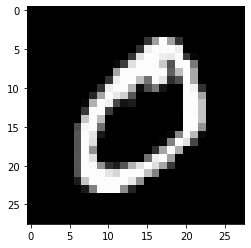

In [15]:
# Grab the first image in the dataset.
test_image = images[1]
models[0].show(test_image)

Lets classify that image.

In [16]:
for model in models:
    print(model.classify(test_image))

0
0


Wow what do you know they are both right. Now lets put those networks together so we can call them an enumerated network.

In [18]:
def ensemble_nn(models,image):
    """Takes in the models and an image to classify. It will
    output the prediction from each model.
    
    Returns:
        List of prediction values from each model.
    """

    return [model.classify(image) for model in models]

Now we have that fancy ensemble_nn function lets use some fancy statitistics and take the mode of the predictions.

In [19]:
from statistics import mode

print(mode(ensemble_nn(models,test_image)))

0
